# Ticket Draw
Lottery for Inkogvito training competition.

Pick winner by a logarithmitically scaled probability distribution.

### Imports

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

### Point distribution

In [58]:
dataframe = pd.read_csv('Poengfordeling.csv', delimiter=';')
dataframe

,Unnamed: 0,Sondre Bolland,Rein Undheim,Thea Gjerde,Ragnhild Larsen,Henriette Rebnor,Beatrix Wu,Anton Nydal,Håkon Bleie,Oskar Jahr,Ingeborg Elly Skori-Holm,Sigurd Setså,Benjamin Øygarden,Bendik Micheeff,Vanessa Marie Haaland,Celine Langeland,Alexander Opdahl,Petter Paulsen,Anders Mikkelsen,Emma Bjørkås
0,Januar,230,63,88,"45,5",58,"45,5",21,49,93,55,100,14,90,0,0,0,0,0,0
1,Feburar,255,14,71,"71,5",30,151,0,4,60,125,"81,5",20,0,50,38,0,0,0,0
2,Mars,"321,5",0,99,104,0,156,0,0,7,"147,5",106,"49,5",117,117,0,85,83,29,22
3,April,"43,5",0,100,65,0,"147,5",0,0,0,154,82,26,96,28,0,0,0,168,0
4,Mai,0,0,86,45,0,76,0,0,0,89,"123,5",0,61,76,0,0,0,228,0
5,Total,850,77,444,331,88,576,21,53,160,"570,5",493,"109,5",364,271,38,85,83,425,22


In [59]:
def scale_all_points(point_list):
    ticket_list = []
    for points in point_list:
        scaled_points = scale_points(points)
        ticket_list.append(scaled_points)
    return ticket_list

def scale_points(points):
    '''
    Calculates the number of tickets from number of points using a logarithmic scale
    '''
    tickets = log_func(points)
    return tickets
    
def log_func(x):
    return round(np.log10(x) * 100, 1)
    
def plot_tickets_and_points(name_list, point_list, ticket_list):
    for i, name in enumerate(name_list):
        x = point_list[i]
        y = ticket_list[i]
        plt.scatter(x, y, marker='x', color='red')
        plt.text(x+0.9, y+0.9, name, fontsize=9)
    plt.xlabel("Points") 
    plt.ylabel("Tickets")
    plt.show()
    
def plot_distribution(dictionary):
    keys = list(dictionary.keys())
    values = list(dictionary.values())
    
    fig = plt.figure(figsize = (12, 5)) 
    
    plt.bar(keys, values,  
        width = 0.4)
    
    plt.xlabel("Contestants") 
    plt.ylabel("Wins") 
    plt.title("Number of wins") 
    plt.show() 
    
def choose_winner(names, tickets, seed=None):
    if seed != None:
        np.random.seed(seed)
    n_participants = len(names)
    total_tickets= np.sum(tickets)
    ticket_probability_distribution = [x / total_tickets for x in tickets]
    
    winner_index = np.random.choice(np.arange(0, n_participants), p=ticket_probability_distribution)
    winner = names[winner_index]
    return winner, winner_index
    
def get_win_distribution(names, tickets, draws=1000):
    winner_list = []
    for i in range(draws):
        winner, winner_index = choose_winner(names, tickets)
        winner_list.append(winner_index)
    number_of_wins = {first_names[i]:winner_list.count(i) for i in winner_list}
    number_of_wins = {k: v for k, v in sorted(number_of_wins.items(), key=lambda item: item[1])}
    return number_of_wins

# Select winner for month

In [67]:
# Enter month name and index
month = 'the semester'
month_index = 5
seed = 3

In [68]:
# Fetch names and points for the given month index. Remove all non participants (those with 0 points for the month)
names = list(dataframe.head())[1:]

month_row = dataframe.loc[month_index]
raw_points = list(month_row.values[1:])
raw_points = [float(i.replace(',','.')) if isinstance(i, str) else float(i) for i in raw_points]

names_temp = copy.deepcopy(names)
raw_points_temp = copy.deepcopy(raw_points)

for name, points in zip(names_temp, raw_points_temp):
    if points == 0:
        names.remove(name)
        raw_points.remove(points)
    

first_names = [name.split(' ', 1)[0] for name in names]

Points:
[850.0, 77.0, 444.0, 331.0, 88.0, 576.0, 21.0, 53.0, 160.0, 570.5, 493.0, 109.5, 364.0, 271.0, 38.0, 85.0, 83.0, 425.0, 22.0]
Tickets:
[292.9, 188.6, 264.7, 252.0, 194.4, 276.0, 132.2, 172.4, 220.4, 275.6, 269.3, 203.9, 256.1, 243.3, 158.0, 192.9, 191.9, 262.8, 134.2]


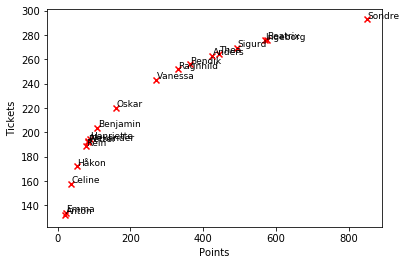

In [69]:
tickets = scale_all_points(raw_points)
print("Points:")
print(raw_points)
print('Tickets:')
print(tickets)

plot_tickets_and_points(first_names, raw_points, tickets)

## Winner distribution with 1 point = 1 ticket (10 000 draws)

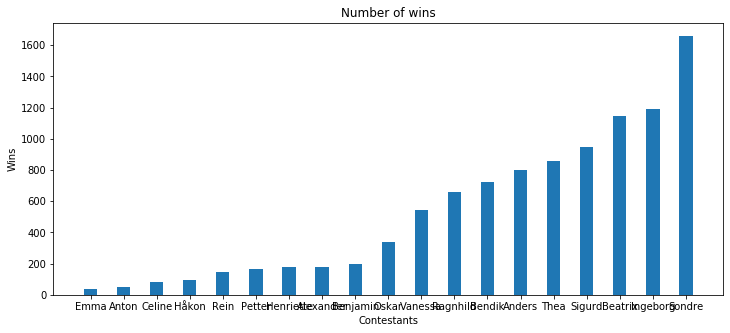

In [70]:
raw_win_distribution = get_win_distribution(names, raw_points, draws=10000)
plot_distribution(raw_win_distribution)

## Winner distribution with scaled tickets (10 000 draws)

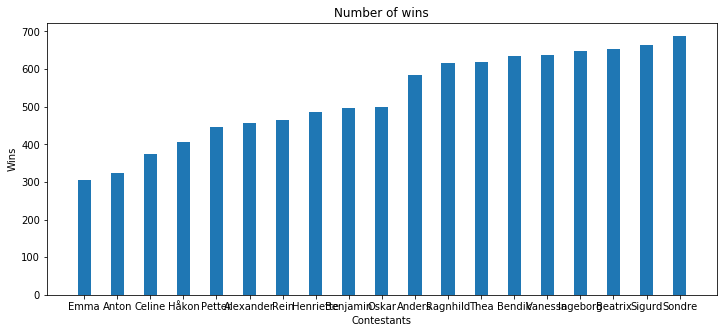

In [71]:
scaled_win_distribution = get_win_distribution(names, tickets, draws=10000)
plot_distribution(scaled_win_distribution)

## Pick Winner

In [72]:
winner, winner_index =  choose_winner(names, tickets, seed=seed)
print(f'The winner of {month} is {winner}')

The winner of the semester is Sigurd Setså
